In this notebook, I will attempt to make a primitive model of the effects of erosion on the coastline. I will employ a 2D array to represent this. We can prepopulate the array with a few rows just to illustrate the concept. A '1' will represent land, and a '0' will represent water.

In [1]:
coast = [[0.0,0.0,0.0,0.0,],[1.0,0.0,1.0,0.0],[1.0,1.0,1.0,1.0],[1.0,1.0,1.0,1.0]]

Next, we can make a function to perform a timestep. In this timestep, we will show the water eroding the non-landlocked elements in our coast. Computationally, we can subtract an arbitrary fraction from the FIRST non-zero element in each COLUMN. Note that the rectangular property of the 2D array is important for this; since each nested list has the same amount of elements, we can iterate by index down each column.

In [2]:
def timestep(coast):
    for col in range(len(coast[0])): # iterate over number of columns
        for row in range(len(coast)): # iterate
            if coast[row][col] > 0:
                coast[row][col] -= 0.2
                coast[row][col] = round(coast[row][col],1)
                break
            

The iteration process looks a bit confusing (at least to me), but the algorithm can be described as follows:

Go down each column in the array, starting from the top left.
If the value is > 0, subtract some arbitrary decimal, stop iterating, and move to the next column.
Proceed this way until you have done every column.

In [3]:
timestep(coast)

for row in coast:
    print(row)

[0.0, 0.0, 0.0, 0.0]
[0.8, 0.0, 0.8, 0.0]
[1.0, 0.8, 1.0, 0.8]
[1.0, 1.0, 1.0, 1.0]


To better visualize this effect, we can make some plots. We will plot overlapping circles to represent a contiguous landmass, each one with the same radius at first. As we take timesteps, we will reduce the radius to reflect shrinking area of land.

In [225]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.patches as mpatches
import numpy as np

(-2.0, 5.0)

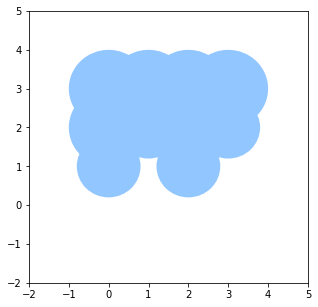

In [226]:
fig, ax = plt.subplots(1,figsize=(5,5))
points = {} # dictionary to keep track of patches by coordinates!
            # this only works because of the 2D array - no two circles
            # will ever have the same coordinates. hideous errors
            # would occur if not for this.
            
for row in range(len(coast)):
    for col in range(len(coast[0])):
        p = mpatches.Circle((col, row), coast[row][col]) # key = coords, val = patch object
        points[(row,col)] = p
        ax.add_patch(p)

plt.xlim([-2,5])
plt.ylim([-2,5])

In [227]:
def graphical_timestep(coast):
    timestep(coast)
    for row in range(len(coast)):
        for col in range(len(coast[0])):
            points[(row,col)].set_radius(coast[row][col])

About to try an animation - this might be ugly

^it didn't work, so have this instead. Scroll fast!

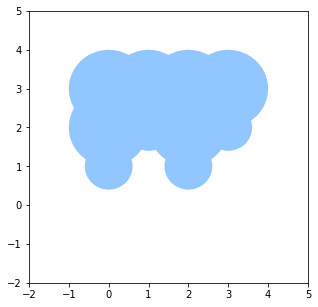

In [228]:
graphical_timestep(coast)
ax.figure

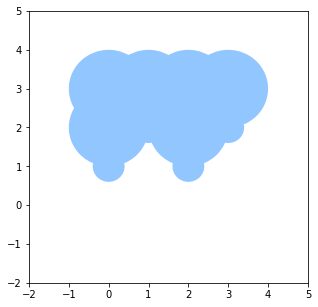

In [229]:
graphical_timestep(coast)
ax.figure

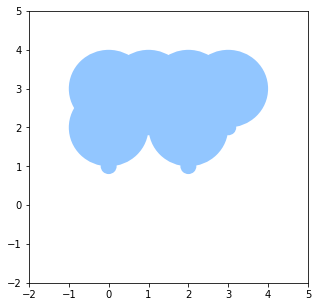

In [230]:
graphical_timestep(coast)
ax.figure

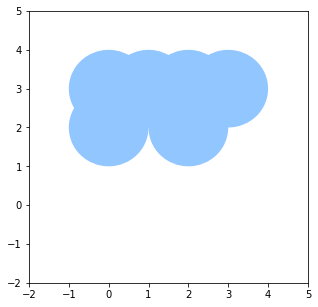

In [231]:
graphical_timestep(coast)
ax.figure

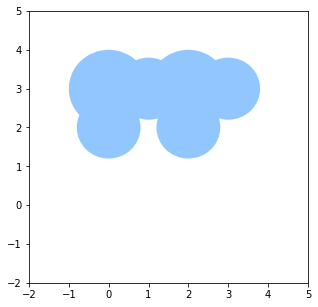

In [232]:
graphical_timestep(coast)
ax.figure

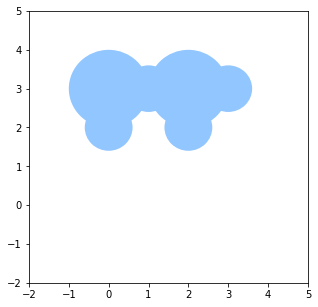

In [233]:
graphical_timestep(coast)
ax.figure

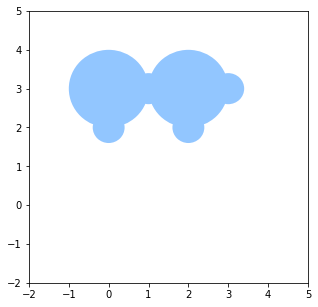

In [234]:
graphical_timestep(coast)
ax.figure

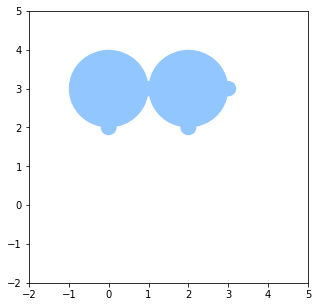

In [235]:
graphical_timestep(coast)
ax.figure

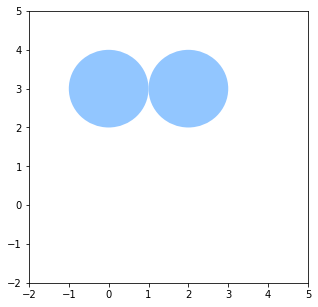

In [236]:
graphical_timestep(coast)
ax.figure

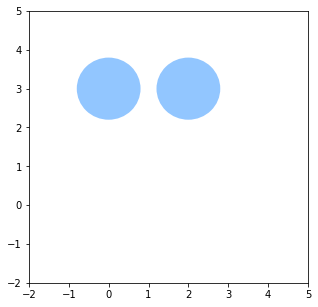

In [237]:
graphical_timestep(coast)
ax.figure

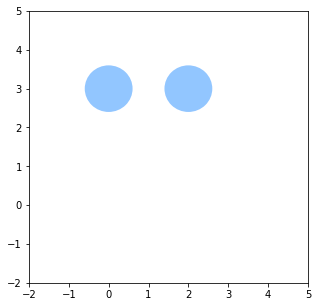

In [238]:
graphical_timestep(coast)
ax.figure

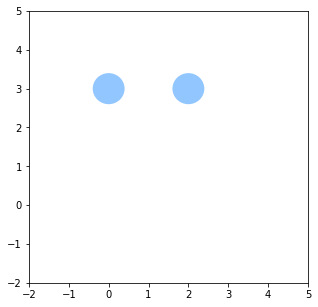

In [239]:
graphical_timestep(coast)
ax.figure

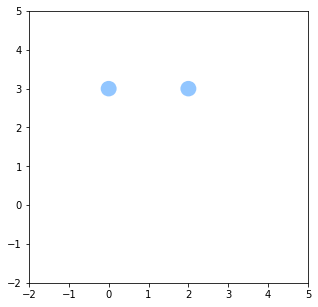

In [240]:
graphical_timestep(coast)
ax.figure

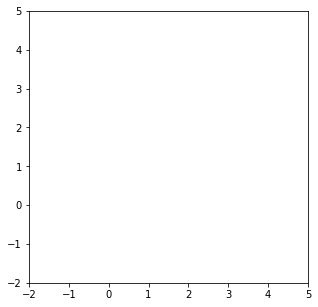

In [241]:
graphical_timestep(coast)
ax.figure